# Coffee Sales

**Objective:** This project aims to analyze a dataset of coffee sales from a vending machine. The analysis seeks to understand customer purchasing patterns, sales trends over time, and customer preferences for different types of coffee. Additionally, the influence of payment methods on sales is evaluated. The ultimate goal is to provide actionable insights to optimize sales and improve customer satisfaction.

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('coffee_sales.csv')
base.head(2)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate


### Data cleaning and transformation

In [3]:
# Searching for missing values

base.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
# Investigating the null values
nulls = base.loc[base['card'].isna()]
nulls.head(2)

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte


In [5]:
# Missing values was paid by cash and have no card number
base = base.fillna('Cash')

In [6]:
# Dropping 'datetime' column
base = base.drop('datetime', axis=1)

In [7]:
# Checking data types
base.dtypes

date            object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [8]:
# Altering data types
base['date'] = pd.to_datetime(base['date'])
base['cash_type'] = base['cash_type'].astype('category')

### EDA

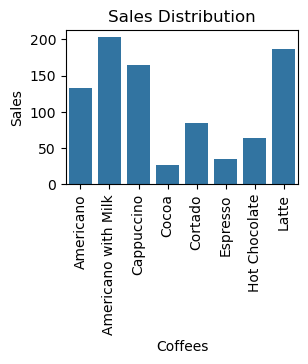

In [9]:
# Sales distribution
import seaborn as sns

plt.figure(figsize=(3,2))
sns.barplot(x = base.groupby('coffee_name').count().index, y = base.groupby('coffee_name')['coffee_name'].count())

plt.xticks(rotation=90)
plt.xlabel('Coffees')
plt.ylabel('Sales')
plt.title('Sales Distribution')
plt.show()


In [10]:
# Monthly Revenue
base['month'] = base.date.dt.month
base.groupby('month')['money'].sum()

month
3    7050.20
4    6720.56
5    9063.42
6    7758.76
Name: money, dtype: float64

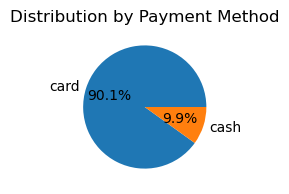

In [11]:
plt.figure(figsize=(2,2))
base['cash_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution by Payment Method')
plt.ylabel('')
plt.show()